In [1]:
import pyrosm
import networkx as nx
import osmnx as ox

In [2]:
# Get filepath to test PBF dataset
fp = pyrosm.get_data("budapest")
print("Filepath to test data:", fp)



# Initialize the OSM object 
osm = pyrosm.OSM(fp)

bounding_box = osm.get_boundaries(name="Budapest")
bbox_geom = bounding_box['geometry'].values[0]

osm = pyrosm.OSM(fp, bounding_box=bbox_geom)


"""
routes = ["bus", "railway", "subway", "train", "tram", "trolleybus"]
rails = ["tramway", "light_rail", "rail", "subway", "tram"]
bus = ['yes']

osm = osm.get_data_by_custom_criteria(custom_filter={
                                        'route': routes,
                                        'railway': rails,
                                        'bus': bus,
                                        'public_transport': True},
                                        # Keep data matching the criteria above
                                        filter_type="keep",
                                        # Do not keep nodes (point data)    
                                        keep_nodes=False, 
                                        keep_ways=True, 
                                        keep_relations=True)"""
# See the type
print("Type of 'osm' instance: ", type(osm))



Filepath to test data: /tmp/pyrosm/Budapest.osm.pbf
Type of 'osm' instance:  <class 'pyrosm.pyrosm.OSM'>


In [3]:
graph_type = {}

n_drive,  e_drive = osm.get_network(nodes=True, network_type="driving")
n_cycling, e_cycling   = osm.get_network(nodes=True, network_type="cycling")
n_walk,   e_walk       = osm.get_network(nodes=True, network_type="walking")
#n_service, e_service   = osm.get_network(nodes=True, network_type="driving+service")

graph_type['drive']     = ox.add_edge_travel_times(ox.add_edge_speeds(osm.to_graph(n_drive, e_drive,  graph_type="networkx")))
graph_type['walk']   = ox.add_edge_travel_times(ox.add_edge_speeds(osm.to_graph(n_walk, e_walk, graph_type="networkx")))
graph_type['cycle']   = ox.add_edge_travel_times(ox.add_edge_speeds(osm.to_graph(n_cycling, e_cycling, graph_type="networkx")))
#graph_type['service']   = ox.add_edge_travel_times(ox.add_edge_speeds(osm.to_graph(n_service, e_service, graph_type="networkx")))




In [57]:
class TourismPlace:
    def __init__(self, name, lon, lat):
        self.name = name
        self.lon = lon
        self.lat = lat


tourism_filter = {"tourism":True}
pois = osm.get_pois(custom_filter=tourism_filter)
pois["tourism"] = pois["tourism"].fillna(' ')
        
tourism_places = []

for x in pois.iterrows():
    tourismpoints_places.append(TourismPlace(x[1][15], x[1][4], x[1][5]))

/home/galffy/.local/lib/python3.10/site-packages/pyrosm/pyrosm.py:576: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  gdf = get_poi_data(
/home/galffy/.local/lib/python3.10/site-packages/geopandas/array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(


In [14]:

def get_route(source_geo, dest_geo, go_type='drive', weight='travel_time',plot=True):
    source_node, dist = ox.nearest_nodes(graph_type[go_type], source_geo[0], source_geo[1], return_dist=True)
    target_node, dist = ox.nearest_nodes(graph_type[go_type], dest_geo[0], dest_geo[1], return_dist=True)
    route = nx.shortest_path(graph_type[go_type], source_node, target_node, weight=weight)
    
    edge_lengths = ox.utils_graph.get_route_edge_attributes(graph_type[go_type], route, 'length') 
    edge_travel_time = ox.utils_graph.get_route_edge_attributes( graph_type[go_type], route, 'travel_time') 
    total_route_length = round(sum(edge_lengths), 1)
    route_travel_time  = round(sum(edge_travel_time)/60, 2)
    if plot:
      ox.plot_graph_route(graph_type[go_type], route, node_size=0, figsize=(40,40))
    return route, total_route_length, route_travel_time

358199312
19.279191532892334
4630791958
86.50718932197219


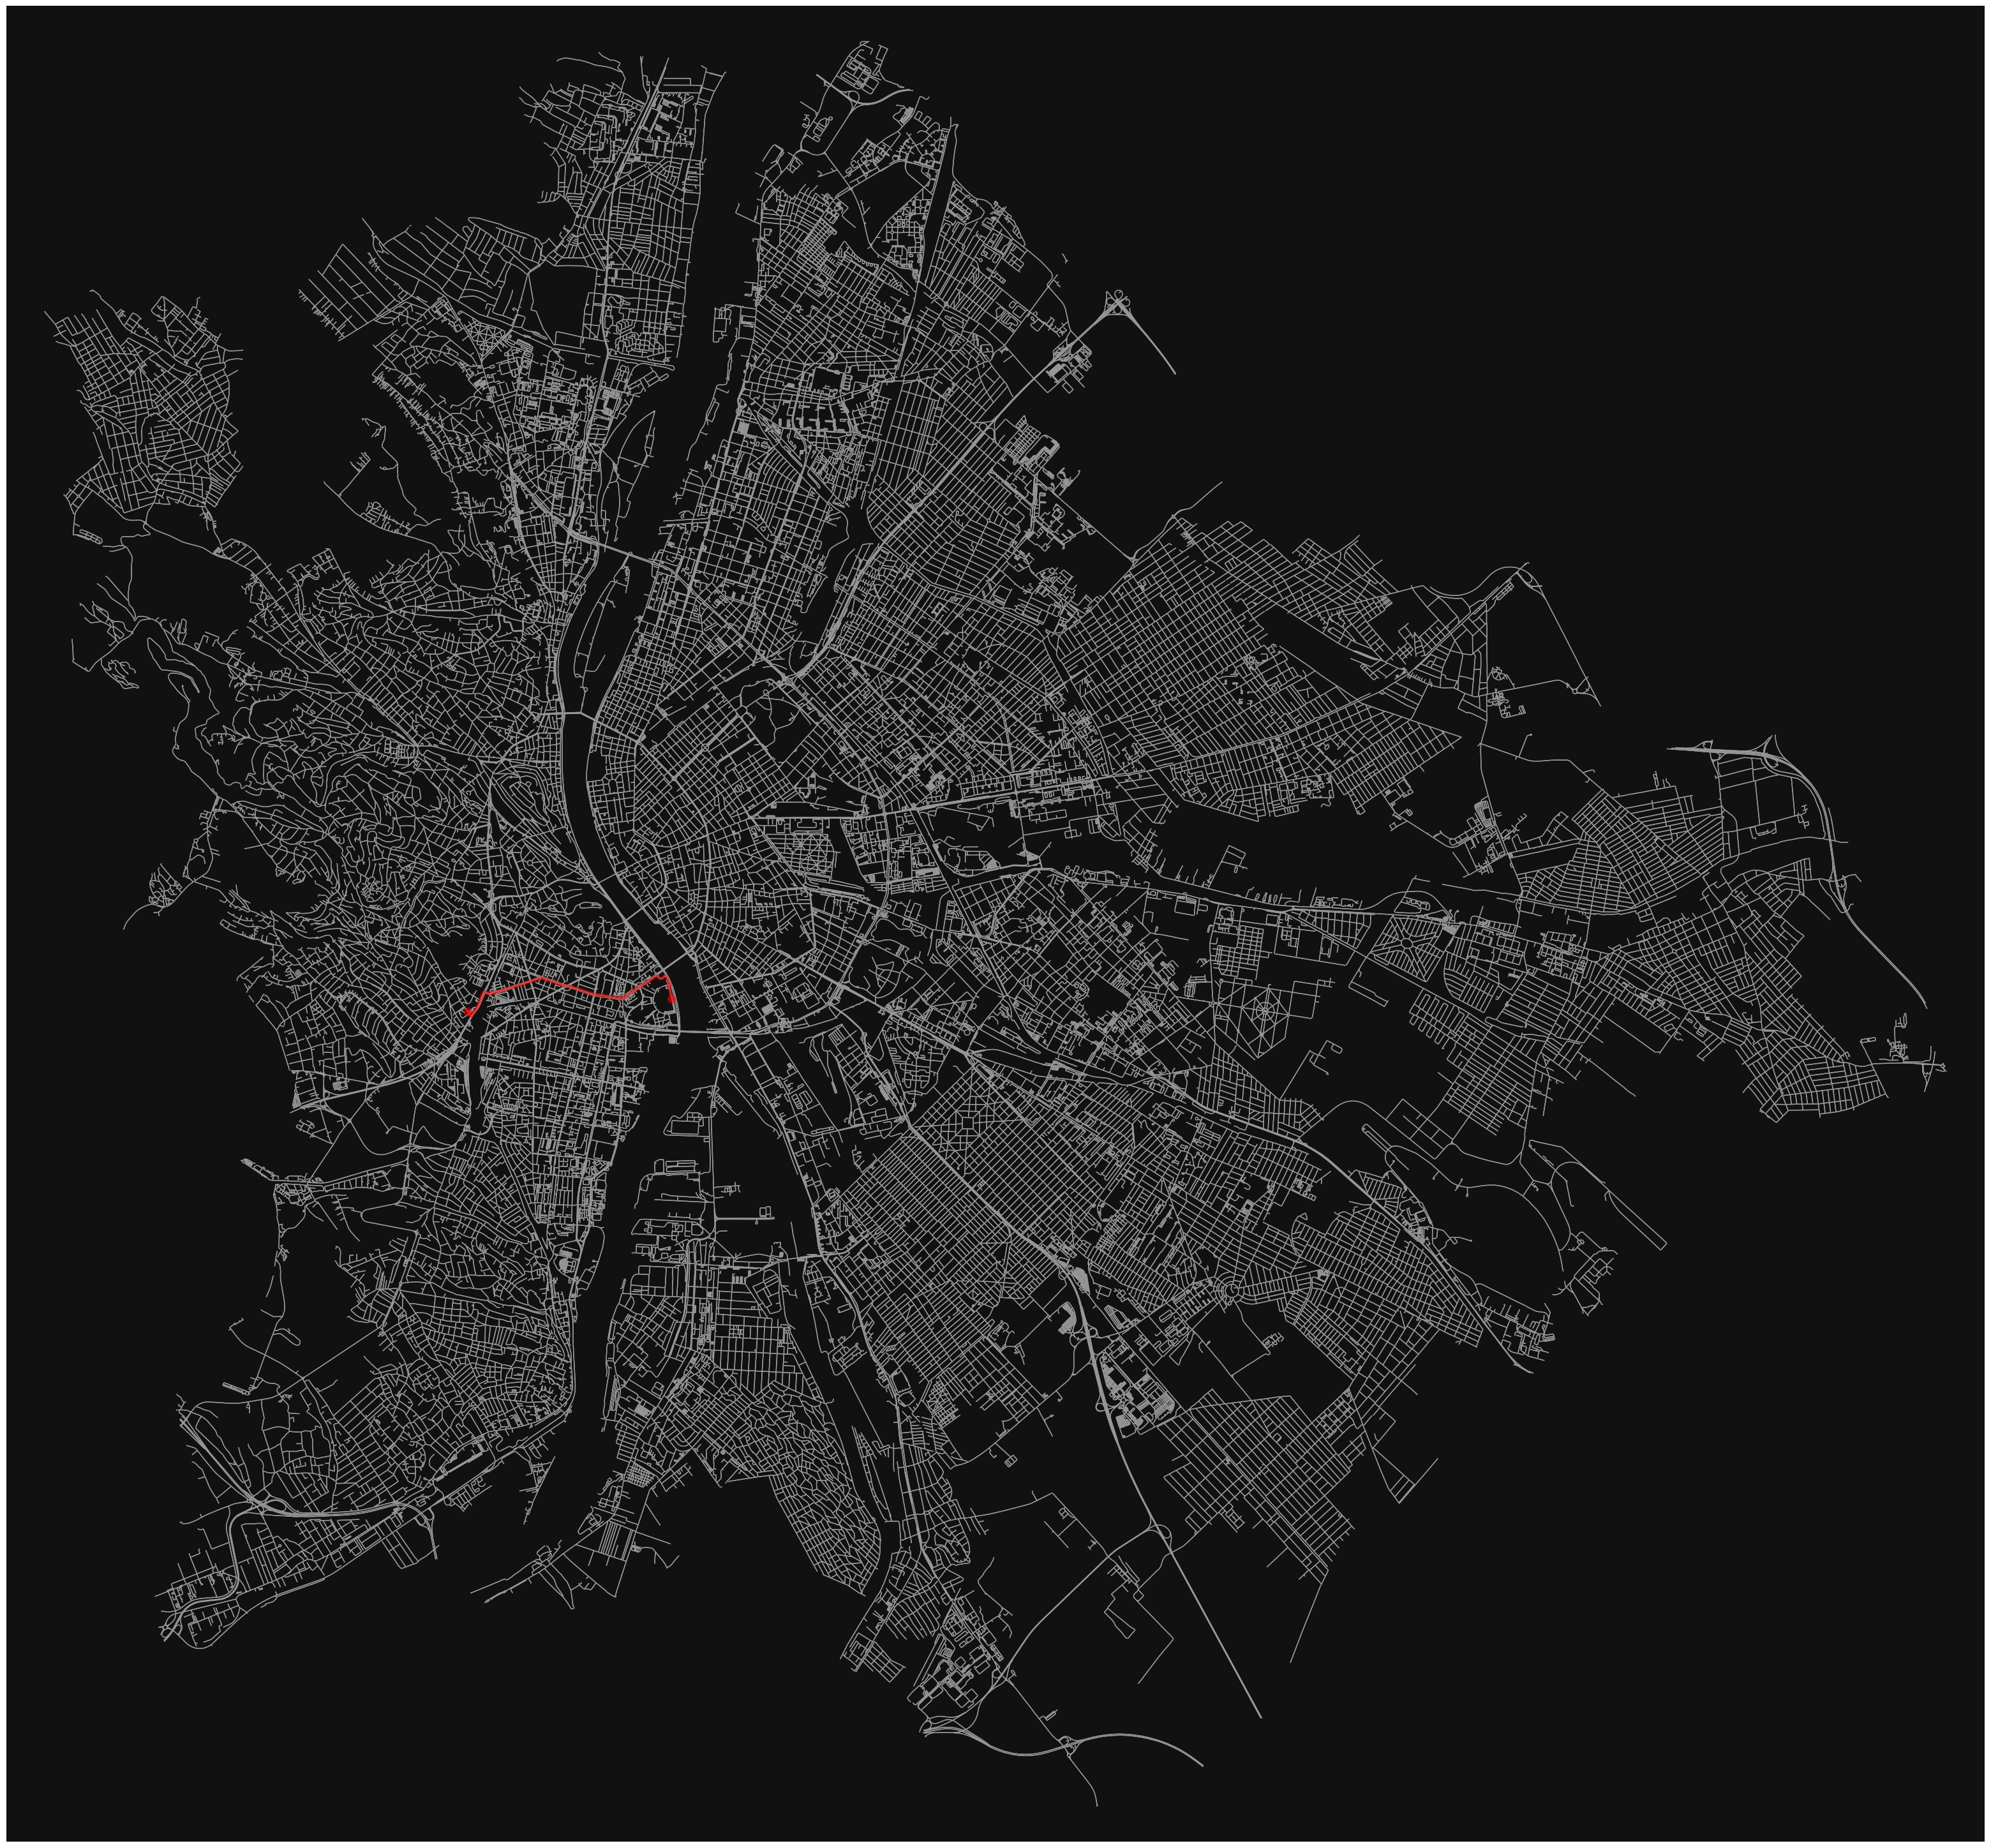

In [59]:
source_loc = (19.019387, 47.471783)
target_loc = (19.061903, 47.473142)
route, length, time = get_route(source_loc, target_loc)

In [83]:
def get_near_tourism_places(route, tourism_places, travel_type="drive", limit=0.1):
    res = []
    for place in tourism_places:
        for node in route:
            if (abs(graph_type[travel_type].nodes[node]["x"] - place.lon) + abs(graph_type[travel_type].nodes[node]["y"] - place.lat))**(1/2) < limit:
                res.append(place)
                break
    return res
        

In [84]:
for key in pois:
    print(key)
for x in pois.iterrows():
    #print(x["name"], x["lon"], x["lat"])
    #print(x["tags"])
    print(x[1][4])     # lon
    print(x[1][5])     # lat
    #print(x[1][6])     # tags
    print(x[1][15])    # name
    print(x[1][19])    # ref (?)
    print()

id
changeset
timestamp
version
lon
lat
tags
addr:city
addr:country
addr:housenumber
addr:housename
addr:postcode
addr:place
addr:street
email
name
opening_hours
operator
phone
ref
url
website
attraction
guest_house
information
museum
tourism
zoo
geometry
osm_type
19.069507598876953
47.604408264160156
Mini
None

19.04709815979004
47.50630187988281
II. Rákóczi Ferenc
None

19.04693031311035
47.5003547668457
Széchenyi István
None

19.048433303833008
47.48663330078125
Szabadság-szobor
None

19.04817771911621
47.499759674072266
Four Seasons Gresham Palace
None

19.0532169342041
47.50680923461914
Hotel Parlament
None

19.048316955566406
47.501182556152344
OTP Bank Pénzügytörténeti Gyűjtemény
None

19.051082611083984
47.49980163574219
Budapest Retro Élményközpont
None

18.941631317138672
47.55810546875
Máriaremetei Szentkút
None

19.054153442382812
47.50898742675781
Kresz Géza Mentőmúzeum
None

19.055362701416016
47.494205474853516
City Hotel Pilvax
None

19.051210403442383
47.49270248413086


19.134822845458984
47.5037841796875
Kakasviadal
None

18.968202590942383
47.517677307128906
Síház sas
1/8

18.98993492126465
47.564613342285156
None
None

18.997512817382812
47.55020523071289
None
Ksziv

18.955516815185547
47.52670669555664
Pálos út
01/06

19.02808952331543
47.50861358642578
Szenes Hanna
None

19.03767967224121
47.52309799194336
None
None

19.03767204284668
47.523094177246094
None
None

19.037656784057617
47.52309036254883
None
None

19.027751922607422
47.508602142333984
None
None

19.04927635192871
47.4666633605957
None
None

18.965349197387695
47.50627899169922
None
None

19.026899337768555
47.484100341796875
None
None

19.02456283569336
47.486934661865234
None
None

19.023714065551758
47.48745346069336
None
None

18.985740661621094
47.52825927734375
None
None

19.056900024414062
47.49985122680664
Paulay Downtown Apartments
None

19.113283157348633
47.467864990234375
Kőrösi Csoma Sándor
None

nan
nan
Váci utca
None

nan
nan
Nagytétényi Kastély
None

nan
nan
Magyar Ál

In [86]:
a = get_near_tourism_places(route, tourist_places)
for x in a:
    print(x.name, x.lon, x.lat)

Professzor Vendégház 19.05573081970215 47.47852325439453
Magyar Nobel-díjasok emlékműve 19.06104850769043 47.4738655090332
Karinthy Frigyes 19.055639266967773 47.475643157958984
Monda 19.031261444091797 47.4660758972168
None 19.042163848876953 47.47792434692383
None 19.040931701660156 47.478153228759766
None 19.033390045166016 47.47660827636719
Víz-szálak 19.05973243713379 47.4733772277832
Zwack Látogatóközpont 19.069988250732422 47.476070404052734
Táncoló lányok 19.047496795654297 47.47242736816406
Halász 19.048715591430664 47.4719123840332
Ülő nő lepellel 19.051488876342773 47.47289276123047
None 19.017871856689453 47.46449279785156
Cseh Tamás 19.053678512573242 47.48343276977539
Csonka János Emlékkiállítás 19.050743103027344 47.479583740234375
Zipernowsky Tudományok és Művészetek Háza 19.050416946411133 47.479347229003906
Három Hét Galéria 19.049983978271484 47.47908020019531
Természetrajzi Múzeum 19.062904357910156 47.472389221191406
None 19.05603790283203 47.48171615600586
None 19